In [4]:
# Importing necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import nltk
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import joblib

- Imports the pandas library for data manipulation and analysis, aliased as 'pd'.
- Imports the numpy library for numerical computing, aliased as 'np'.
- Imports pyplot module from matplotlib for creating static, animated, and interactive visualizations.
- Imports seaborn library for statistical data visualization.
- Imports WordCloud class from wordcloud library for creating word cloud visualizations.
- Imports Counter class from collections module for counting hashable objects.
- Imports the Natural Language Toolkit (NLTK) for natural language processing tasks.
- Imports the re module for working with regular expressions.
- Imports train_test_split function from scikit-learn for splitting datasets into training and testing sets.
- Imports TfidfVectorizer from scikit-learn for converting text to numerical feature vectors.
- Imports MultinomialNB (Multinomial Naive Bayes) classifier from scikit-learn.
- Imports LinearSVC (Linear Support Vector Classification) from scikit-learn.
- Imports RandomForestClassifier from scikit-learn for ensemble learning.
- Imports accuracy_score function from scikit-learn to compute classification accuracy.
- Imports joblib library for saving and loading Python objects (like machine learning models).

In [8]:
# Download necessary ntlk data
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /home/siddhant/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


1. Data Collection

In [9]:
# Load the datasets
url = "https://raw.githubusercontent.com/siddhantbhattarai/practice-datasets/main/SMSSpamCollection"
df = pd.read_csv(url, sep='\t', names=['label', 'message'])
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


2. Data Cleaning

In [12]:
# Checking the missing values
df.isnull().sum()

label      0
message    0
dtype: int64

In [11]:
# Checking the duplicated values
df.duplicated().sum()

403

In [13]:
# Remove the duplicated values
cleaned_df = df.drop_duplicates()

In [15]:
# Checking for duplicated values if exists
cleaned_df.duplicated().sum()

0

In [16]:
# Basics statistics of datasets
cleaned_df.describe()

,label,message
count,5169,5169
unique,2,5169
top,ham,"Go until jurong point, crazy.. Available only ..."
freq,4516,1


In [17]:
# Cunt the span vs ham messages
cleaned_df['label'].value_counts()

label
ham     4516
spam     653
Name: count, dtype: int64

In [19]:
# Checking the size of datasets
cleaned_df.shape

(5169, 2)

In [20]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

3. Data Visualization

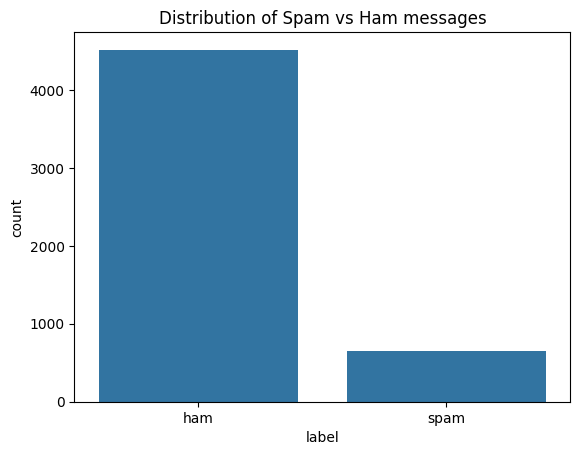

In [22]:
# Distribution of spam vs ham messages
sns.countplot(x='label', data=cleaned_df)
plt.title("Distribution of Spam vs Ham messages")
plt.show()

In [23]:
# Word Clouds for spam and ham messages
spam_words = ''.join(cleaned_df[cleaned_df['label'] == 'spam']['message'])
ham_words = ''.join(cleaned_df[cleaned_df['label'] == 'ham']['message'])

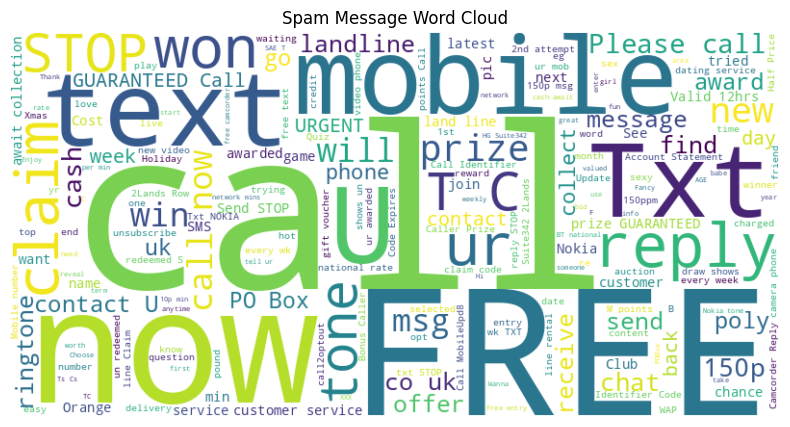

In [24]:
spam_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(spam_words)
plt.figure(figsize=(10,5))
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.title("Spam Message Word Cloud")
plt.axis("off")
plt.show()

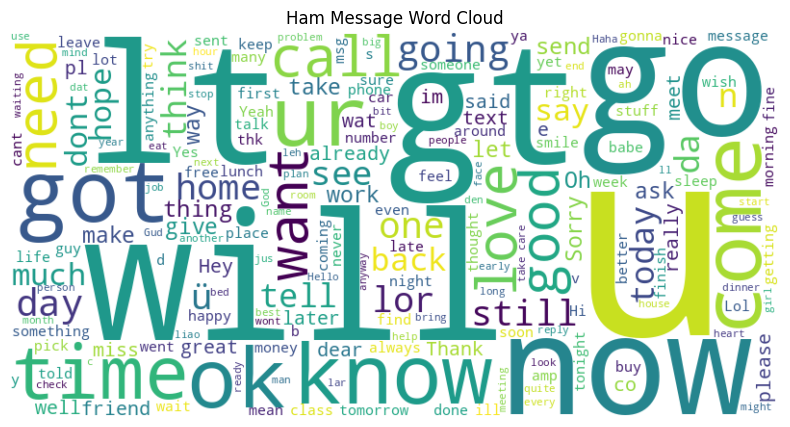

In [26]:
ham_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(ham_words)
plt.figure(figsize=(10,5))
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.title("Ham Message Word Cloud")
plt.axis("off")
plt.show()

In [31]:
# Further Datacleaning
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    text = ' '.join(text.split())
    return text

# Create a copy of the original DataFrame
cleaned_df = df.copy()

# Apply the clean_text function to the 'message' column
cleaned_df['message'] = cleaned_df['message'].apply(clean_text)

4. Data Preprocessing

In [32]:
X = cleaned_df['message']
y = cleaned_df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

5. Feature Engineering

In [33]:
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

6. Model Selection

In [34]:
# Multinomial Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

MultinomialNB()

In [36]:
# Linear SVC
svc_model = LinearSVC(dual=False)
svc_model.fit(X_train_tfidf, y_train)

LinearSVC(dual=False)

In [37]:
# Random Forest Classifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train_tfidf, y_train)

RandomForestClassifier()

7.  Model Evaluation

In [40]:
nb_predictions = nb_model.predict(X_test_tfidf)
svc_predictions = svc_model.predict(X_test_tfidf)
rf_predictions = rf_model.predict(X_test_tfidf)

nb_accuracy = accuracy_score(y_test, nb_predictions)
svc_accuracy = accuracy_score(y_test, svc_predictions)
rf_accuracy = accuracy_score(y_test, rf_predictions)

print(f"Multinomial Naive Bayes Accuracy: {nb_accuracy*100:.2f}%")
print(f"SVC Accuracy: {svc_accuracy*100:.2f}%")
print(f"RFC Accuracy: {rf_accuracy*100:.2f}%")

Multinomial Naive Bayes Accuracy: 95.78%
SVC Accuracy: 98.74%
RFC Accuracy: 97.67%
